In [1]:
!pip install matplotlib

In [2]:
!pip install wordcloud

  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=161754 sha256=7cc9391a244304419a6f3f90612d5c0907fcdf663c874ff9efd54eabaaaf76c5
  Stored in directory: c:\users\da_mi\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


In [3]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud


In [4]:
import nltk 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
all_files = glob.glob('C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data/myCabinetExcelData*.xls')

In [5]:
all_files

['C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data\\myCabinetExcelData (1).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data\\myCabinetExcelData (2).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data\\myCabinetExcelData (3).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data\\myCabinetExcelData (4).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data\\myCabinetExcelData (5).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data\\myCabinetExcelData (6).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data\\myCabinetExcelData (7).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data\\myCabinetExcelData (8).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data\\myCabinetExcelData (9).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data\\myCabinetExcelData.xls']

In [6]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,A Big Data Guide to Understanding Climate Chan...,unknown,Mary Ann Leibert,2014
1,NaN,2,Big data (lost) in the cloud,"Di Martino, Beniamino; Aversa, Rocco; Cretella...",Inderscience,2014
2,NaN,3,Common Big Data Challenges and How to Overcome...,unknown,Mary Ann Leibert,2014
3,NaN,4,Call for Special Issue Papers: Big Data in Bus...,"Nobanee, Haitham",Mary Ann Leibert,2020
4,NaN,5,SOOM: Sort-Based Optimizer for Big Data Multi-...,"Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...",Mary Ann Leibert,2020
...,...,...,...,...,...,...
95,NaN,96,A review on sentiment discovery and analysis o...,"Han, Zhongmei; Wu, Jiyi; Huang, Changqin; Huan...",John Wiley & Sons Ltd,2020
96,NaN,97,Big data analytics—a review of data‐mining mod...,"Mohd Selamat, Siti Aishah; Prakoonwit, Simant;...",John Wiley & Sons Ltd,2018
97,NaN,98,Big data analytics—A review of data‐mining mod...,"Mohd Selamat, Siti Aishah; Prakoonwit, Simant;...",John Wiley & Sons Ltd,2018
98,NaN,99,"Big, Bigger, Biggest: Data repositories balloo...",unknown,SOURCE MEDIA INC.,2013


In [7]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,A Big Data Guide to Understanding Climate Chan...,unknown,Mary Ann Leibert,2014
1,NaN,2,Big data (lost) in the cloud,"Di Martino, Beniamino; Aversa, Rocco; Cretella...",Inderscience,2014
2,NaN,3,Common Big Data Challenges and How to Overcome...,unknown,Mary Ann Leibert,2014
3,NaN,4,Call for Special Issue Papers: Big Data in Bus...,"Nobanee, Haitham",Mary Ann Leibert,2020
4,NaN,5,SOOM: Sort-Based Optimizer for Big Data Multi-...,"Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...",Mary Ann Leibert,2020
...,...,...,...,...,...,...
995,NaN,96,"Interview with Dr. Silvio Carta, Author of the...","Carta, Silvio",Mary Ann Leibert,2019
996,NaN,97,Internet of Things-Based Optimized Routing and...,"Menon, Varun G.; Verma, Sandeep; Kaur, Satnam;...",Mary Ann Leibert,2021
997,NaN,98,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
998,NaN,99,STGI：a spatio-temporal grid index model for ma...,"Qu, Tengteng; Wang, Lizhe; Yu, Jian; Yan, Jini...",John Wiley & Sons Ltd,2020


In [8]:
all_files_data_concat.to_csv('C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/source/My_Python/8장_data/riss_bigdata.csv', encoding = 'utf-8', index=False)

In [9]:
all_title = all_files_data_concat['제목']
all_title

0      A Big Data Guide to Understanding Climate Chan...
1                           Big data (lost) in the cloud
2      Common Big Data Challenges and How to Overcome...
3      Call for Special Issue Papers: Big Data in Bus...
4      SOOM: Sort-Based Optimizer for Big Data Multi-...
                             ...                        
995    Interview with Dr. Silvio Carta, Author of the...
996    Internet of Things-Based Optimized Routing and...
997    An Ensemble-Based Scalable Approach for Intrus...
998    STGI：a spatio-temporal grid index model for ma...
999    Big Data, Little Data, and Care Coordination f...
Name: 제목, Length: 1000, dtype: object

In [10]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [17]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower()) 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    words.append(EnWordsTokenStopLemma)


In [18]:
print(words)

[['big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science'], ['big', 'data', 'lost', 'cloud'], ['common', 'big', 'data', 'challenge', 'overcome'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'business'], ['soom', 'sort', 'based', 'optimizer', 'big', 'data', 'multi', 'query'], ['big', 'data', 'efficient', 'market', 'end', 'daily', 'fantasy', 'sport', 'know'], ['recent', 'advance', 'earth', 'observation', 'big', 'data', 'hydrology'], ['big', 'data', 'predictive', 'analytics', 'health', 'care'], ['big', 'data', 'robotics'], ['medical', 'school', 'training', 'relate', 'practice', 'evidence', 'big', 'data'], ['intelligent', 'big', 'data', 'analysis', 'review'], ['improved', 'big', 'data', 'stock', 'index', 'prediction', 'using', 'deep', 'learning', 'cnn', 'gru'], ['health', 'big', 'data', 'analytics', 'current', 'perspective', 'challenge', 'potential', 'solution'], ['leveraging', 'big', 'data', 'analytics', 'case', 'kenyan', 'telec

In [19]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2) #출력하여 내용 확인

['big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science', 'big', 'data', 'lost', 'cloud', 'common', 'big', 'data', 'challenge', 'overcome', 'call', 'special', 'issue', 'paper', 'big', 'data', 'business', 'soom', 'sort', 'based', 'optimizer', 'big', 'data', 'multi', 'query', 'big', 'data', 'efficient', 'market', 'end', 'daily', 'fantasy', 'sport', 'know', 'recent', 'advance', 'earth', 'observation', 'big', 'data', 'hydrology', 'big', 'data', 'predictive', 'analytics', 'health', 'care', 'big', 'data', 'robotics', 'medical', 'school', 'training', 'relate', 'practice', 'evidence', 'big', 'data', 'intelligent', 'big', 'data', 'analysis', 'review', 'improved', 'big', 'data', 'stock', 'index', 'prediction', 'using', 'deep', 'learning', 'cnn', 'gru', 'health', 'big', 'data', 'analytics', 'current', 'perspective', 'challenge', 'potential', 'solution', 'leveraging', 'big', 'data', 'analytics', 'case', 'kenyan', 'telecom', 'health', 'big', 'data

In [20]:
count = Counter(words2)
count #출력하여 내용 확인

Counter({'big': 1119,
         'data': 1254,
         'guide': 4,
         'understanding': 12,
         'climate': 2,
         'change': 4,
         'case': 13,
         'theory': 5,
         'guided': 1,
         'science': 36,
         'lost': 2,
         'cloud': 27,
         'common': 2,
         'challenge': 49,
         'overcome': 1,
         'call': 22,
         'special': 24,
         'issue': 36,
         'paper': 20,
         'business': 19,
         'soom': 1,
         'sort': 1,
         'based': 96,
         'optimizer': 1,
         'multi': 10,
         'query': 5,
         'efficient': 19,
         'market': 11,
         'end': 2,
         'daily': 1,
         'fantasy': 1,
         'sport': 4,
         'know': 4,
         'recent': 5,
         'advance': 4,
         'earth': 24,
         'observation': 6,
         'hydrology': 1,
         'predictive': 8,
         'analytics': 116,
         'health': 29,
         'care': 11,
         'robotics': 3,
         'medical':

In [22]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1254
big : 1119
analytics : 116
based : 96
analysis : 80
using : 60
driven : 60
approach : 59
system : 55
challenge : 49
learning : 46
model : 43
new : 42
science : 36
issue : 36
application : 36
framework : 34
smart : 33
platform : 33
management : 33
perspective : 32
opportunity : 30
health : 29
research : 29
review : 28
algorithm : 28
cloud : 27
processing : 27
machine : 27
era : 26
information : 25
mining : 25
special : 24
earth : 24
computing : 23
social : 23
use : 23
call : 22
technology : 22
survey : 22
process : 22
service : 21
development : 21
paper : 20
network : 20
energy : 20
business : 19
efficient : 19
distributed : 19
small : 19


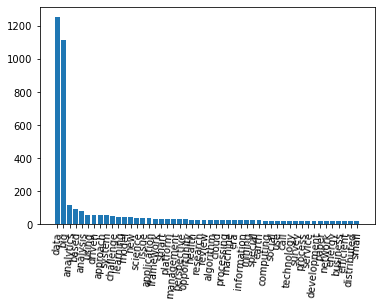

In [24]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [25]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1995,1
1,2003,1
2,2004,1
3,2011,7
4,2012,20
5,2013,54
6,2014,128
7,2015,106
8,2016,130
9,2017,139


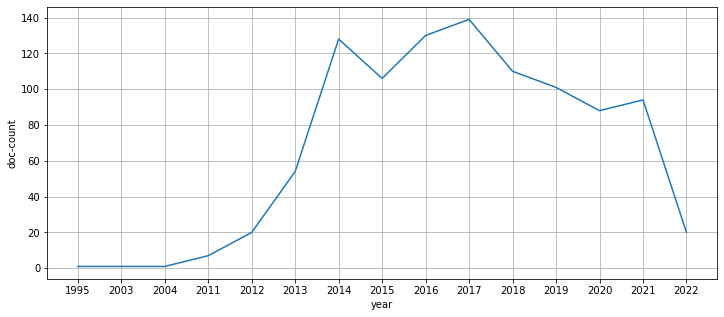

In [26]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

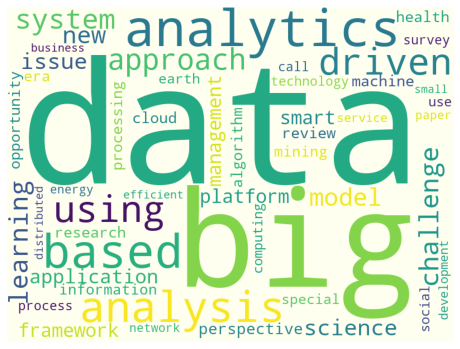

In [27]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()